<a href="https://colab.research.google.com/github/oferbaharav/DS-Unit-2-Kaggle-Challenge/blob/master/Copy_of_DS_Sprint_Challenge_6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll predict whether each shot was made, using information about the shot and the game. This is hard to predict! Try to get above 60% accuracy. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
# Read data
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)

# Check data shape
assert df.shape == (13958, 20)

In [4]:
df.head(2)

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0


To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

You are permitted and encouraged to do as much data exploration as you want.

**1. Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is your baseline accuracy, if you guessed the majority class for every prediction?

**2. Hold out your test set.** Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

**3. Engineer new feature.** Engineer at least **1** new feature, from this list, or your own idea.
- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**4. Decide how to validate** your model. Choose one of the following options. Any of these options are good. You are not graded on which you choose.
- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
- **Train/validate/test split: random 80/20%** train/validate split.
- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

**5.** Use a scikit-learn **pipeline** to **encode categoricals** and fit a **Decision Tree** or **Random Forest** model.

**6.** Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.) 

**7.** Get your model's **test accuracy.** (One time, at the end.)


**8.** Given a **confusion matrix** for a hypothetical binary classification model, **calculate accuracy, precision, and recall.**

### Stretch Goals
- Engineer 4+ new features total, either from the list above, or your own ideas.
- Make 2+ visualizations to explore relationships between features and target.
- Optimize 3+ hyperparameters by trying 10+ "candidates" (possible combinations of hyperparameters). You can use `RandomizedSearchCV` or do it manually.
- Get and plot your model's feature importances.



## 1. Begin with baselines for classification. 

>Your target to predict is `shot_made_flag`. What would your baseline accuracy be, if you guessed the majority class for every prediction?

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split df into train & test
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['shot_made_flag'], random_state=42)


train.shape, test.shape

((11166, 20), (2792, 20))

In [6]:
df.shape

(13958, 20)

In [7]:
# Split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['shot_made_flag'], random_state=42)


train.shape, val.shape

((8932, 20), (2234, 20))

In [8]:
target = 'shot_made_flag'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.527094
1    0.472906
Name: shot_made_flag, dtype: float64

In [0]:
#Baseline is .53 didn't make the shot, and 0.47 made shot

## 2. Hold out your test set.

>Use the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your test set has 1,709 observations.

In [10]:
test1 = df[(df['game_date'] >= '2018-10-01') & (df['game_date'] <= '2019-06-30')]
test1.shape                                              

(1709, 20)

In [11]:
train1 = df[(df['game_date'] < '2018-10-01') | (df['game_date'] > '2019-06-30')]
train1.shape

(12249, 20)

## 3. Engineer new feature.

>Engineer at least **1** new feature, from this list, or your own idea.
>
>- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
>- **Opponent**: Who is the other team playing the Golden State Warriors?
>- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
>- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
>- **Made previous shot**: Was Steph Curry's previous shot successful?

    

In [12]:
df.head(2)

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0


In [13]:
df['homecourt_advantage'] = df['htm'] == 'GSW'
df.head(2)

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot,homecourt_advantage
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0,True
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0,True


In [58]:
#adding seconds and minutes and creating new column (this is at the end, coming back after discovering it may be important feature to track)
df['total_seconds'] = df['minutes_remaining']*60 + df['seconds_remaining']
df.head(2)

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot,homecourt_advantage,total_seconds
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0,True,685
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0,True,571


## **4. Decide how to validate** your model. 

>Choose one of the following options. Any of these options are good. You are not graded on which you choose.
>
>- **Train/validate/test split: train on the 2009-10 season through 2016-17 season, validate with the 2017-18 season.** You'll know you've split the data correctly when your train set has 11,081 observations, and your validation set has 1,168 observations.
>- **Train/validate/test split: random 80/20%** train/validate split.
>- **Cross-validation** with independent test set. You may use any scikit-learn cross-validation method.

In [59]:
#train test split 
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['shot_made_flag'], random_state=42)


train.shape, test.shape

((11166, 22), (2792, 22))

In [60]:
#train, val split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['shot_made_flag'], random_state=42)


train.shape, val.shape

((8932, 22), (2234, 22))

## 5. Use a scikit-learn pipeline to encode categoricals and fit a Decision Tree or Random Forest model.

In [0]:
# The shot_made_flag column is the target
target = 'shot_made_flag'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 500
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [62]:
print(numeric_features)

['game_id', 'game_event_id', 'period', 'minutes_remaining', 'seconds_remaining', 'shot_distance', 'loc_x', 'loc_y', 'scoremargin_before_shot', 'total_seconds']


In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [64]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5532676812891674


In [0]:
# from sklearn.tree import DecisionTreeClassifier
# feature = 'homecourt_advantage'
# dt = make_pipeline(
#     ce.OneHotEncoder(use_cat_names=True), 
#     SimpleImputer(), 
#     DecisionTreeClassifier(random_state=42)
# )

# dt.fit(X_train[[feature]], y_train)
# score = dt.score(X_val[[feature]], y_val)
# print('Decision Tree, Validation Accuracy', score)

In [65]:
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)

encoded.shape

(8932, 98)

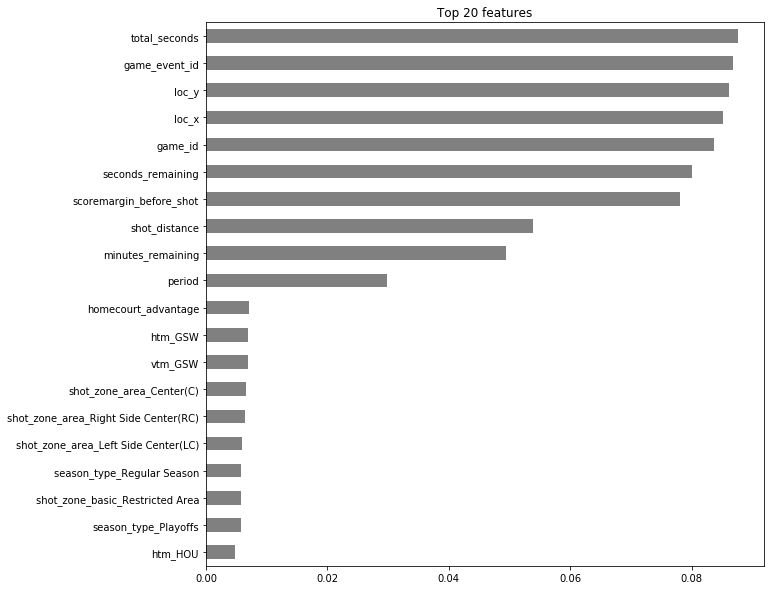

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
X_train_dropped = X_train.drop(columns= [ 
               'game_event_id', 'minutes_remaining', 'seconds_remaining'])
X_val_dropped = X_val.drop(columns= [ 
               'game_event_id', 'minutes_remaining', 'seconds_remaining'])
X_test_dropped = X_test.drop(columns= [ 
               'game_event_id', 'minutes_remaining', 'seconds_remaining'])

In [0]:
X_train_dropped.head(2)

In [81]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True, cols=categorical_features),
    
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train_dropped, y_train)
y_pred = pipeline.predict(X_val_dropped)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.5501342882721576


## 6.Get your model's validation accuracy

> (Multiple times if you try multiple iterations.)

In [0]:
#see above

## 7. Get your model's test accuracy

> (One time, at the end.)

In [32]:
# Fit on train, score on test

y_pred = pipeline.predict(X_test_dropped)
print('Validation Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.5576647564469914


## 8. Given a confusion matrix, calculate accuracy, precision, and recall.

Imagine this is the confusion matrix for a binary classification model. Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

### Calculate accuracy 

In [38]:
# Compute the confusion_matrix
y_pred = pipeline.predict(X_val_dropped)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[766, 411],
       [564, 493]])

In [39]:
# Get the unique labels
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)

array([0, 1])

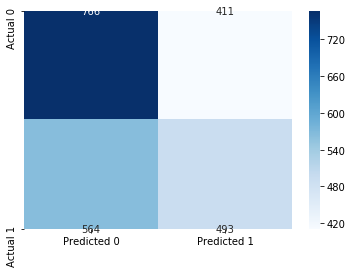

In [41]:
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred):
  labels = unique_labels(y_true)
  columns = [f'Predicted {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  df = pd.DataFrame(confusion_matrix(y_true, y_pred),
                    columns = columns,
                    index = index)
  return sns.heatmap(df, annot=True, fmt='d', cmap='Blues')

plot_confusion_matrix(y_val, y_pred);


In [0]:
correct_predictions = 766+493

In [0]:
total_predictions = len(y_val)

In [50]:
accuracy = correct_predictions/total_predictions
accuracy

0.563563115487914

### Calculate precision

In [42]:
correct_1 = 493
total_pred_1 = 493+411
precision_1 = correct_1/total_pred_1
precision_1

0.5453539823008849

### Calculate recall

In [44]:
total_actual_1 = 564 + 493
recall_1 = correct_1/total_actual_1
recall_1

0.4664143803216651